<a href="https://colab.research.google.com/github/avisinghal6/Preferential_attachment_Graphs/blob/main/ML_Graphs2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import networkx as nx

In [2]:
import numpy as np

In [3]:
G=nx.Graph()
for i in range(12):
  G.add_node(i)

G.add_edge(0,1)
G.add_edge(0,2)
G.add_edge(0,3)
G.add_edge(4,5)
G.add_edge(4,6)
G.add_edge(4,7)
G.add_edge(8,9)
G.add_edge(8,10)
G.add_edge(8,11)


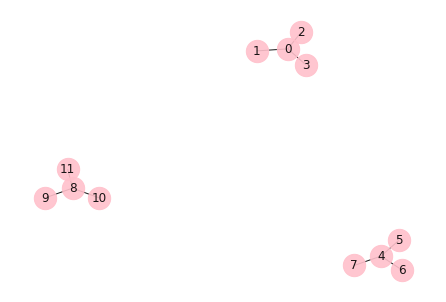

In [4]:
pos = nx.spring_layout(G)
nx.draw(
  G, pos, edge_color='black', width=1, linewidths=1,
  node_size=500, node_color='pink', alpha=0.9,
  labels={node: node for node in G.nodes()}
)


If I only consider the 3 nodes with highest degree, then below are the results.

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve,f1_score

In [11]:
True_GraphA=[1,0,0]
Pred_GraphA=[1,1,1]
auc=roc_auc_score(True_GraphA,Pred_GraphA)
f1score = f1_score(True_GraphA,Pred_GraphA)
print(f"AUC Score:{auc}, F1score:{f1score}")

AUC Score:0.5, F1score:0.5


In [13]:
True_GraphB=[1,1,0]
Pred_GraphB=[1,1,1]
auc=roc_auc_score(True_GraphB,Pred_GraphB)
f1score = f1_score(True_GraphB,Pred_GraphB)
print(f"AUC Score:{auc}, F1score:{f1score}")

AUC Score:0.5, F1score:0.8


AUC is the same for both the graphs, so it does not distinguish between the two settings, but using F1 score we can see a distinction, the F1score is higher for case 2. Below, I consider all the edges and their proabilities instead of just considering the 3 as above.

In [16]:
preds = nx.preferential_attachment(G)

In [15]:

for u, v, p in preds:
  print(f"({u}, {v}) -> {p}")

(0, 4) -> 9
(0, 5) -> 3
(0, 6) -> 3
(0, 7) -> 3
(0, 8) -> 9
(0, 9) -> 3
(0, 10) -> 3
(0, 11) -> 3
(1, 2) -> 1
(1, 3) -> 1
(1, 4) -> 3
(1, 5) -> 1
(1, 6) -> 1
(1, 7) -> 1
(1, 8) -> 3
(1, 9) -> 1
(1, 10) -> 1
(1, 11) -> 1
(2, 3) -> 1
(2, 4) -> 3
(2, 5) -> 1
(2, 6) -> 1
(2, 7) -> 1
(2, 8) -> 3
(2, 9) -> 1
(2, 10) -> 1
(2, 11) -> 1
(3, 4) -> 3
(3, 5) -> 1
(3, 6) -> 1
(3, 7) -> 1
(3, 8) -> 3
(3, 9) -> 1
(3, 10) -> 1
(3, 11) -> 1
(4, 8) -> 9
(4, 9) -> 3
(4, 10) -> 3
(4, 11) -> 3
(5, 6) -> 1
(5, 7) -> 1
(5, 8) -> 3
(5, 9) -> 1
(5, 10) -> 1
(5, 11) -> 1
(6, 7) -> 1
(6, 8) -> 3
(6, 9) -> 1
(6, 10) -> 1
(6, 11) -> 1
(7, 8) -> 3
(7, 9) -> 1
(7, 10) -> 1
(7, 11) -> 1
(9, 10) -> 1
(9, 11) -> 1
(10, 11) -> 1


In [17]:
predictions=np.zeros((1,57))
i=0
for u, v, p in preds:
  predictions[0][i]=p
  i+=1

In [18]:
predictions

array([[9., 3., 3., 3., 9., 3., 3., 3., 1., 1., 3., 1., 1., 1., 3., 1.,
        1., 1., 1., 3., 1., 1., 1., 3., 1., 1., 1., 3., 1., 1., 1., 3.,
        1., 1., 1., 9., 3., 3., 3., 1., 1., 3., 1., 1., 1., 1., 3., 1.,
        1., 1., 3., 1., 1., 1., 1., 1., 1.]])

In [19]:
predictions=predictions/np.sum(predictions)

In [20]:
predictions=predictions.T

In [21]:
predictions

array([[0.07692308],
       [0.02564103],
       [0.02564103],
       [0.02564103],
       [0.07692308],
       [0.02564103],
       [0.02564103],
       [0.02564103],
       [0.00854701],
       [0.00854701],
       [0.02564103],
       [0.00854701],
       [0.00854701],
       [0.00854701],
       [0.02564103],
       [0.00854701],
       [0.00854701],
       [0.00854701],
       [0.00854701],
       [0.02564103],
       [0.00854701],
       [0.00854701],
       [0.00854701],
       [0.02564103],
       [0.00854701],
       [0.00854701],
       [0.00854701],
       [0.02564103],
       [0.00854701],
       [0.00854701],
       [0.00854701],
       [0.02564103],
       [0.00854701],
       [0.00854701],
       [0.00854701],
       [0.07692308],
       [0.02564103],
       [0.02564103],
       [0.02564103],
       [0.00854701],
       [0.00854701],
       [0.02564103],
       [0.00854701],
       [0.00854701],
       [0.00854701],
       [0.00854701],
       [0.02564103],
       [0.008

In [22]:
true_labels=np.zeros((57,1))

In [23]:
true_labels[0][0]=1

In [24]:
# true_labels=true_labels.T
true_labels

array([[1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

[1.07692308 0.07692308 0.02564103 0.00854701]
[0.         0.03571429 0.35714286 1.        ]
[0. 1. 1. 1.]


Text(0, 0.5, 'True Positive Rate')

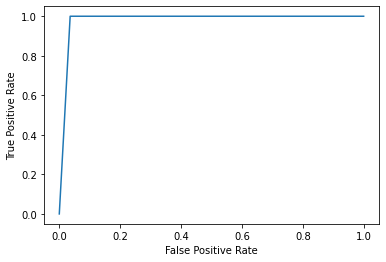

In [26]:
fpr, tpr, thresholds = roc_curve(true_labels, predictions)
plt.plot(fpr, tpr)
print(thresholds)
print(fpr)
print(tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [29]:
roc_auc_score(true_labels, predictions)

0.9821428571428571

In [30]:
true_labels2=np.zeros((57,1))

In [31]:
true_labels2[0][0]=1
true_labels2[35][0]=1


In [32]:
true_labels2

array([[1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

[1.07692308 0.07692308 0.02564103 0.00854701]
[0.         0.01818182 0.34545455 1.        ]
[0. 1. 1. 1.]


Text(0, 0.5, 'True Positive Rate')

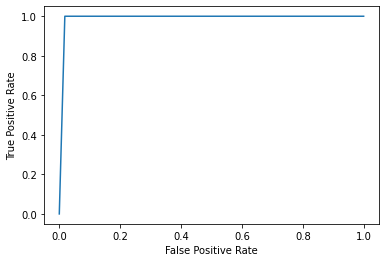

In [33]:
fpr, tpr, thresholds = roc_curve(true_labels2, predictions)
plt.plot(fpr, tpr)
print(thresholds)
print(fpr)
print(tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [34]:
roc_auc_score(true_labels2, predictions)

0.990909090909091

In this case, the AUC shows a difference between the two settings, the AUC is higher for Case 2 which is as expected.